In [1]:
from sklearn.ensemble import RandomForestClassifier

import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
dataset = pd.read_csv('diamonds.csv')

In [7]:
dataset['cut'] = dataset.cut.map({'Ideal':1,'Premium':2, 'Good':3, 'Very Good':4, 'Fair':5})
dataset['color'] = dataset.color.map({'E':1,'I':2, 'J':3, 'H':4, 'F':5, 'G':6, 'D':7})
dataset['clarity'] = dataset.clarity.map({'SI2':1, 'SI1':2, 'VS1':3, 'VS2':4, 'VVS2':5, 'VVS1':6, 'I1':7, 'IF':8})

In [10]:
dataset

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,1,1,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,2,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,3,1,3,56.9,65.0,327,4.05,4.07,2.31
3,0.29,2,2,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,3,3,1,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,1,7,2,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,3,7,2,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,4,7,2,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,2,4,1,61.0,58.0,2757,6.15,6.12,3.74


In [11]:
data_x = dataset.drop(['cut'], axis='columns')
data_y = dataset.cut

In [12]:
data_x.describe()

,carat,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,4.174416,3.256136,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,2.050156,1.766539,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,1.000000,1.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,2.000000,2.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,5.000000,3.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,6.000000,4.000000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,7.000000,8.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [13]:
data_y.describe()

count    53940.000000
mean         2.228940
std          1.265976
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max          5.000000
Name: cut, dtype: float64

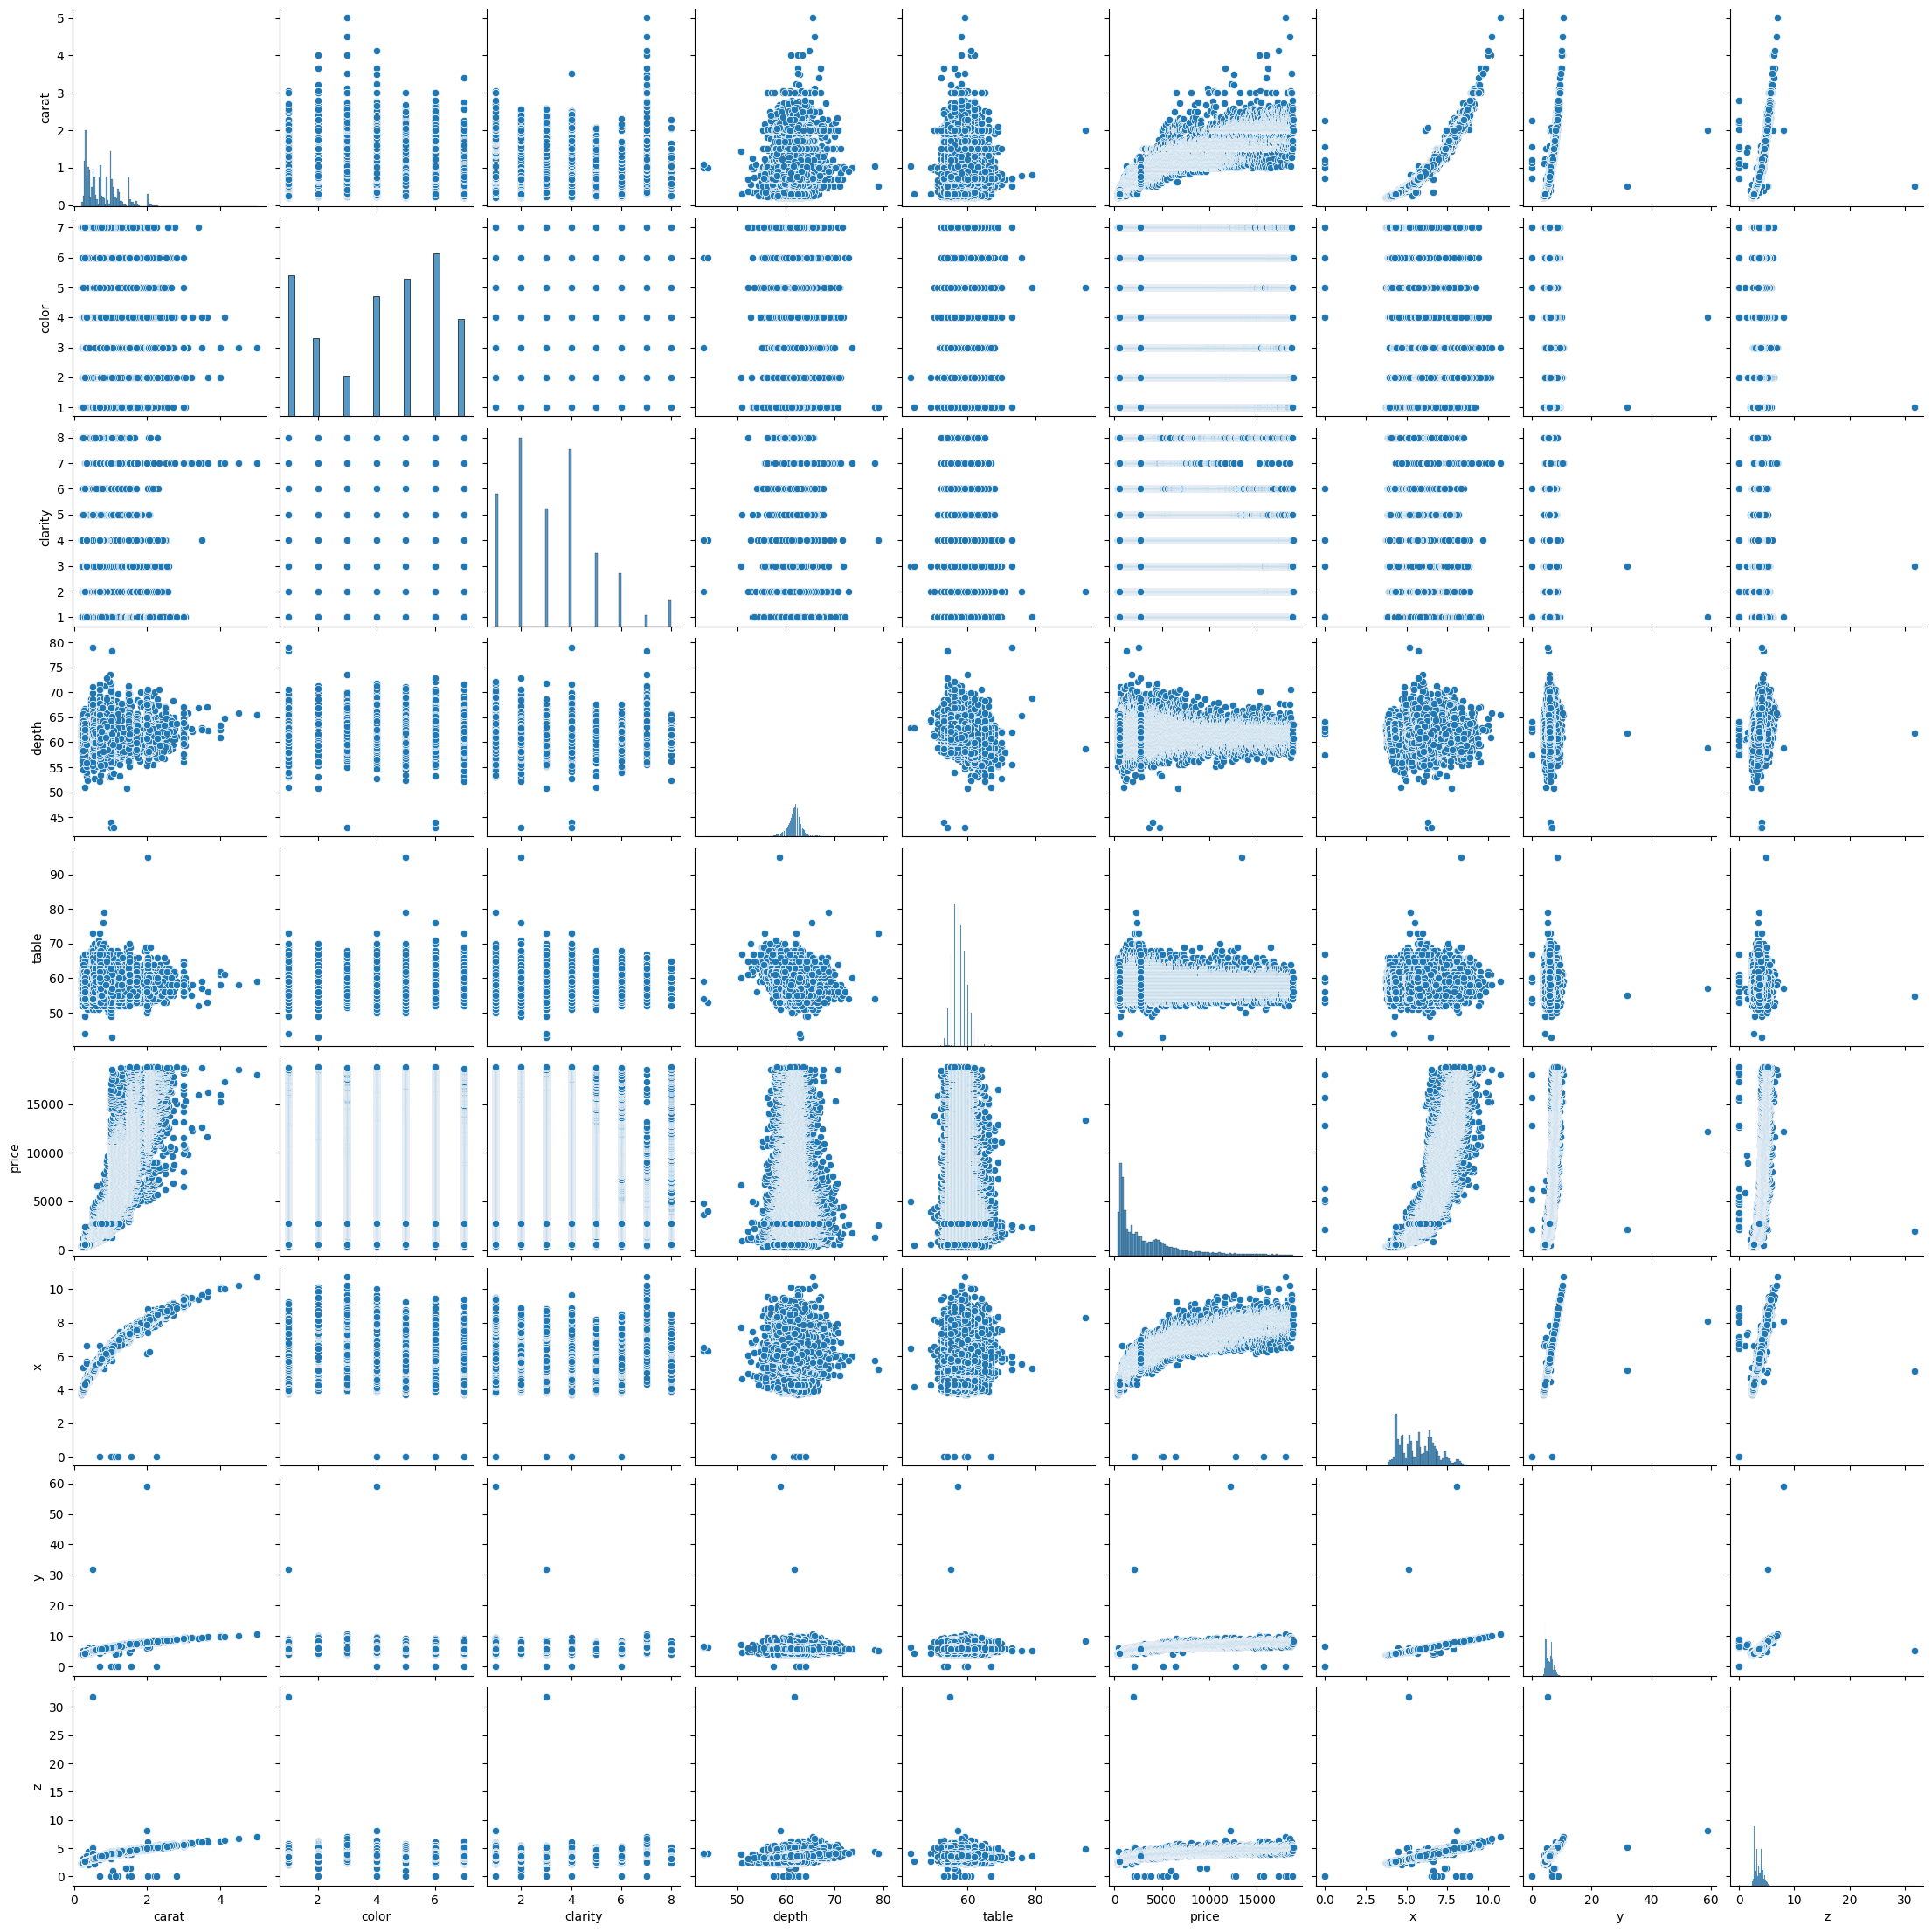

In [14]:
sns.pairplot(data_x)

In [15]:
model_forest = RandomForestClassifier()

In [16]:
model_forest.fit(data_x, data_y)

RandomForestClassifier()

In [18]:
print(f'El score del modelo es: {round(model_forest.score(data_x, data_y), 4) *100}%')

El score del modelo es: 99.99%


In [20]:
data_x

,carat,color,clarity,depth,table,price,x,y,z
0,0.23,1,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,3,56.9,65.0,327,4.05,4.07,2.31
3,0.29,2,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,3,1,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
53935,0.72,7,2,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,7,2,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,7,2,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,4,1,61.0,58.0,2757,6.15,6.12,3.74


In [33]:
def classify_price(model, carat, color,	clarity, depth,	table, price, x,	y,	z):
  result = model.predict([[carat, color,	clarity, depth,	table, price, x,	y,	z]])
  print(f'El diamante con los siguientes datos: \n *Peso del diamante en kilate: {carat}kt \n *Color del diamante: {list_color[color]} \n *Claridad del diamante: {list_clarity[clarity]} \n *Profundidad del diamante: {depth} \n *Tamaño de la mesa del diamante: {table} \n *Precio del diamante: {price}  \n *Largo del diamante: {x} \n *Ancho del diamante: {y} \n *Alto del diamante: {z} \n *Tiene un corte de: {result[0]} ')

In [34]:
#datos
list_color = ['None', 'E', 'I', 'J', 'H', 'F', 'G', 'D']
list_clarity = ['None', 'SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']
#list_cut =  ['None', 'Ideal', 'Premium', 'Good', 'Very Good', 'Fair']

In [38]:
carat = 0.75
table = 55.0
color = 5
clarity = 3
depth = 62.4
price = 335
x = 5.79
y = 5.20
z = 4.49

In [39]:
classify_price(model_forest, carat, color,	clarity, depth,	table, price, x, y, z)

El diamante con los siguientes datos: 
 *Peso del diamante en kilate: 0.75kt 
 *Color del diamante: F 
 *Claridad del diamante: VS1 
 *Profundidad del diamante: 62.4 
 *Tamaño de la mesa del diamante: 55.0 
 *Precio del diamante: 335  
 *Largo del diamante: 5.79 
 *Ancho del diamante: 5.2 
 *Alto del diamante: 4.49 
 *Tiene un corte de: 1 


c:\Users\Usuario\LOURDES_c\NUR\AlgoritmicaAvanzada\avance-personal\entornos\proyecto_tres\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
